In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=transforms.InterpolationMode.NEAREST),
    transforms.ToTensor()
])

ds_train = datasets.ImageFolder("/datasets/kaggle-car-truck/train", transform=transform)
ds_valid = datasets.ImageFolder("/datasets/kaggle-car-truck/valid", transform=transform)

dl_train = DataLoader(ds_train, batch_size=64, shuffle=True)
dl_valid = DataLoader(ds_valid, batch_size=64, shuffle=True)

dl_dict = {"train": dl_train, "valid": dl_valid}

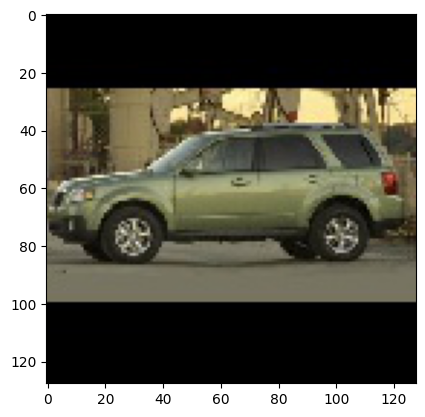

In [3]:
for images, labels in dl_train:
    plt.imshow(images[0].numpy().transpose((1, 2, 0)))
    break

In [8]:
import torch.nn as nn
from torchvision import models
from torchvision.models.vgg import vgg16


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg = vgg16(weights=models.VGG16_Weights, progress=True)
        self.vgg.classifier[6] = nn.Linear(4096, 2)

        for param in self.vgg.features.parameters():
            param.requires_grad = False
        for param in self.vgg.avgpool.parameters():
            param.requires_grad = False
        for param in self.vgg.classifier.parameters():
            param.requires_grad = True

    def forward(self, x):
        x = self.vgg(x)
        return x


net = Net()
net.train()

Net(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): MaxPoo

In [9]:
from torch import optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.vgg.classifier.parameters(), lr=1e-3, momentum=0.9)

In [10]:
from tqdm import tqdm

device = torch.device("cuda")
net = net.to(device)

accuracy_list = []
loss_list = []

num_epochs = 30
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch+1, num_epochs))
    print('-------------')

    for phase in ["train", "valid"]:
        if phase == "train":
            net.train()
        else:
            net.eval()

        epoch_loss = 0.0
        epoch_corrects = 0

        for inputs, labels in tqdm(dl_dict[phase]):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = net(inputs)

                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                epoch_loss += loss.item() * inputs.size(0)  
                epoch_corrects += torch.sum(preds == labels.data)

        epoch_loss = epoch_loss / len(dl_dict[phase].dataset)
        epoch_acc = epoch_corrects.double() / len(dl_dict[phase].dataset)

        if phase == 'valid':
            accuracy_list.append(epoch_acc.item())
            loss_list.append(epoch_loss)

        print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

Epoch 1/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.86it/s]


train Loss: 0.4750 Acc: 0.7760


100%|██████████| 79/79 [00:13<00:00,  5.72it/s]


valid Loss: 0.3456 Acc: 0.8485
Epoch 2/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.84it/s]


train Loss: 0.3846 Acc: 0.8323


100%|██████████| 79/79 [00:14<00:00,  5.55it/s]


valid Loss: 0.3236 Acc: 0.8606
Epoch 3/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.81it/s]


train Loss: 0.3442 Acc: 0.8485


100%|██████████| 79/79 [00:13<00:00,  5.73it/s]


valid Loss: 0.3083 Acc: 0.8681
Epoch 4/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.75it/s]


train Loss: 0.3165 Acc: 0.8618


100%|██████████| 79/79 [00:13<00:00,  5.69it/s]


valid Loss: 0.2991 Acc: 0.8719
Epoch 5/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.75it/s]


train Loss: 0.3071 Acc: 0.8655


100%|██████████| 79/79 [00:13<00:00,  5.70it/s]


valid Loss: 0.3134 Acc: 0.8640
Epoch 6/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.83it/s]


train Loss: 0.2756 Acc: 0.8870


100%|██████████| 79/79 [00:13<00:00,  5.69it/s]


valid Loss: 0.2966 Acc: 0.8733
Epoch 7/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.83it/s]


train Loss: 0.2542 Acc: 0.8968


100%|██████████| 79/79 [00:13<00:00,  5.67it/s]


valid Loss: 0.2879 Acc: 0.8773
Epoch 8/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.83it/s]


train Loss: 0.2384 Acc: 0.8982


100%|██████████| 79/79 [00:13<00:00,  5.69it/s]


valid Loss: 0.2832 Acc: 0.8798
Epoch 9/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.77it/s]


train Loss: 0.2210 Acc: 0.9109


100%|██████████| 79/79 [00:13<00:00,  5.70it/s]


valid Loss: 0.2792 Acc: 0.8812
Epoch 10/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.82it/s]


train Loss: 0.1961 Acc: 0.9160


100%|██████████| 79/79 [00:13<00:00,  5.69it/s]


valid Loss: 0.2764 Acc: 0.8826
Epoch 11/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.83it/s]


train Loss: 0.1955 Acc: 0.9189


100%|██████████| 79/79 [00:13<00:00,  5.68it/s]


valid Loss: 0.2735 Acc: 0.8840
Epoch 12/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.83it/s]


train Loss: 0.1719 Acc: 0.9291


100%|██████████| 79/79 [00:13<00:00,  5.70it/s]


valid Loss: 0.2705 Acc: 0.8870
Epoch 13/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.84it/s]


train Loss: 0.1580 Acc: 0.9355


100%|██████████| 79/79 [00:13<00:00,  5.70it/s]


valid Loss: 0.2771 Acc: 0.8850
Epoch 14/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.83it/s]


train Loss: 0.1541 Acc: 0.9400


100%|██████████| 79/79 [00:13<00:00,  5.71it/s]


valid Loss: 0.2772 Acc: 0.8854
Epoch 15/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.82it/s]


train Loss: 0.1418 Acc: 0.9423


100%|██████████| 79/79 [00:13<00:00,  5.69it/s]


valid Loss: 0.2769 Acc: 0.8856
Epoch 16/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.82it/s]


train Loss: 0.1344 Acc: 0.9478


100%|██████████| 79/79 [00:13<00:00,  5.68it/s]


valid Loss: 0.2711 Acc: 0.8911
Epoch 17/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.80it/s]


train Loss: 0.1178 Acc: 0.9523


100%|██████████| 79/79 [00:13<00:00,  5.69it/s]


valid Loss: 0.2750 Acc: 0.8901
Epoch 18/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.78it/s]


train Loss: 0.1112 Acc: 0.9564


100%|██████████| 79/79 [00:13<00:00,  5.67it/s]


valid Loss: 0.2774 Acc: 0.8903
Epoch 19/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.79it/s]


train Loss: 0.0980 Acc: 0.9613


100%|██████████| 79/79 [00:13<00:00,  5.69it/s]


valid Loss: 0.2867 Acc: 0.8919
Epoch 20/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.82it/s]


train Loss: 0.0944 Acc: 0.9627


100%|██████████| 79/79 [00:13<00:00,  5.70it/s]


valid Loss: 0.2822 Acc: 0.8891
Epoch 21/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.82it/s]


train Loss: 0.0801 Acc: 0.9711


100%|██████████| 79/79 [00:13<00:00,  5.68it/s]


valid Loss: 0.2946 Acc: 0.8911
Epoch 22/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.82it/s]


train Loss: 0.0725 Acc: 0.9752


100%|██████████| 79/79 [00:13<00:00,  5.66it/s]


valid Loss: 0.2983 Acc: 0.8877
Epoch 23/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.82it/s]


train Loss: 0.0715 Acc: 0.9752


100%|██████████| 79/79 [00:13<00:00,  5.66it/s]


valid Loss: 0.2939 Acc: 0.8915
Epoch 24/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.82it/s]


train Loss: 0.0695 Acc: 0.9769


100%|██████████| 79/79 [00:14<00:00,  5.63it/s]


valid Loss: 0.3065 Acc: 0.8842
Epoch 25/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.82it/s]


train Loss: 0.0604 Acc: 0.9787


100%|██████████| 79/79 [00:13<00:00,  5.69it/s]


valid Loss: 0.3011 Acc: 0.8937
Epoch 26/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.83it/s]


train Loss: 0.0550 Acc: 0.9828


100%|██████████| 79/79 [00:13<00:00,  5.65it/s]


valid Loss: 0.3152 Acc: 0.8913
Epoch 27/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.81it/s]


train Loss: 0.0497 Acc: 0.9842


100%|██████████| 79/79 [00:13<00:00,  5.67it/s]


valid Loss: 0.3129 Acc: 0.8885
Epoch 28/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.81it/s]


train Loss: 0.0460 Acc: 0.9836


100%|██████████| 79/79 [00:13<00:00,  5.69it/s]


valid Loss: 0.3136 Acc: 0.8931
Epoch 29/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.83it/s]


train Loss: 0.0447 Acc: 0.9848


100%|██████████| 79/79 [00:13<00:00,  5.69it/s]


valid Loss: 0.3199 Acc: 0.8943
Epoch 30/30
-------------


100%|██████████| 80/80 [00:16<00:00,  4.83it/s]


train Loss: 0.0400 Acc: 0.9867


100%|██████████| 79/79 [00:13<00:00,  5.70it/s]

valid Loss: 0.3163 Acc: 0.8953


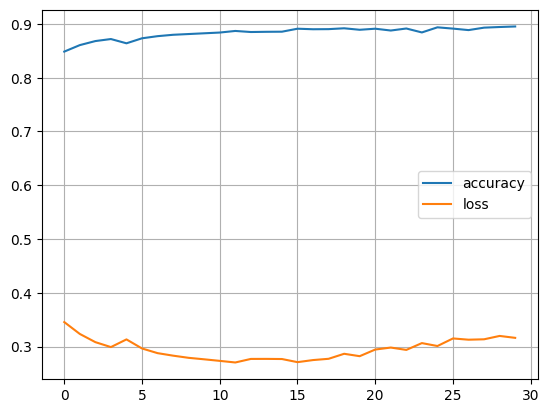

In [12]:
epoch_num = list(range(num_epochs))
plt.plot(epoch_num, accuracy_list, label="accuracy")
plt.plot(epoch_num, loss_list, label="loss")
plt.legend()
plt.grid()

tensor([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0], device='cuda:0')


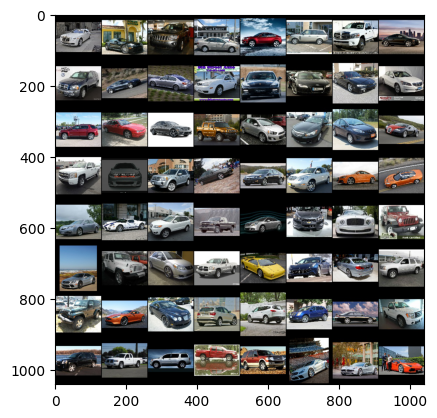

In [18]:
from torchvision.utils import make_grid

images, labels = next(iter(dl_valid))

inputs = images.to(device)
net.eval()
with torch.no_grad():
    outputs = net(inputs)
    _, preds = torch.max(outputs, 1)
    print(preds)

plt.imshow(make_grid(images).numpy().transpose((1, 2, 0)))